# Project Statement
To perform classification analysis on Iris Dataset.Perform any two classification algorithms and compare the accuracy.

### Import Libraries

In [1]:
# Importing the necessary libraries:

# Preprocessing libraries
import numpy as np
import pandas as pd

# Libraries to evaluate the dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split

# Graph plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Other necessary libraries
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
#Loading dataset
df=pd.read_csv('/content/Iris')

In [3]:
#printing first-five rows of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Statistical info
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Datatypes info 
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
#To display number of samples on each class in Species column
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Label Encoding

In [8]:
#Changing names of Species name to digits
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
species_id = df["Species"].unique()
print("Specie label: ",species_id)

Specie label:  [0 1 2]


### Data Preprocessing

In [10]:
#Checking for null values in various attributes in dataset
print("Column Name","\t","No.of Null values")
print(df.isnull().sum())

Column Name 	 No.of Null values
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Exploratory Data Analysis

#### Visualizing various columns data in form of histogram

Text(0.5, 1.0, 'Sepal Length')

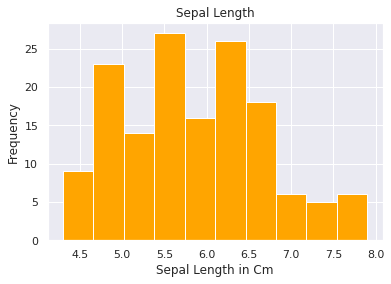

In [11]:
#Histograms
df['SepalLengthCm'].hist(color='orange')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Frequency')
plt.title('Sepal Length')

Text(0.5, 1.0, 'Sepal Width')

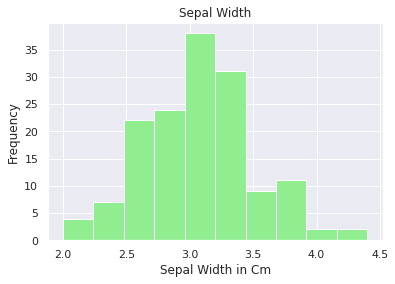

In [12]:
df['SepalWidthCm'].hist(color='lightgreen')
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Frequency')
plt.title('Sepal Width')

Text(0.5, 1.0, 'Petal Length')

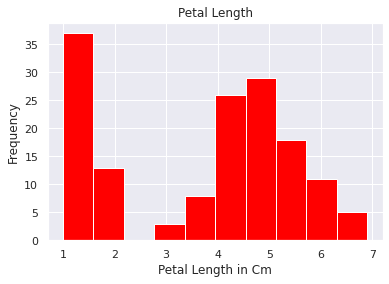

In [13]:
df['PetalLengthCm'].hist(color='red')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Frequency')
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Width')

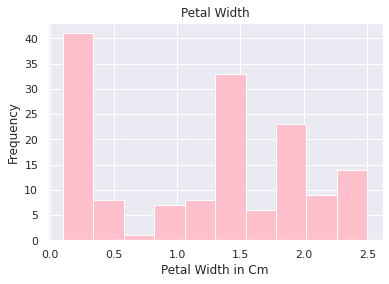

In [14]:
df['PetalWidthCm'].hist(color='pink')
plt.xlabel('Petal Width in Cm')
plt.ylabel('Frequency')
plt.title('Petal Width')

#### Scatterplot distinguished by Species

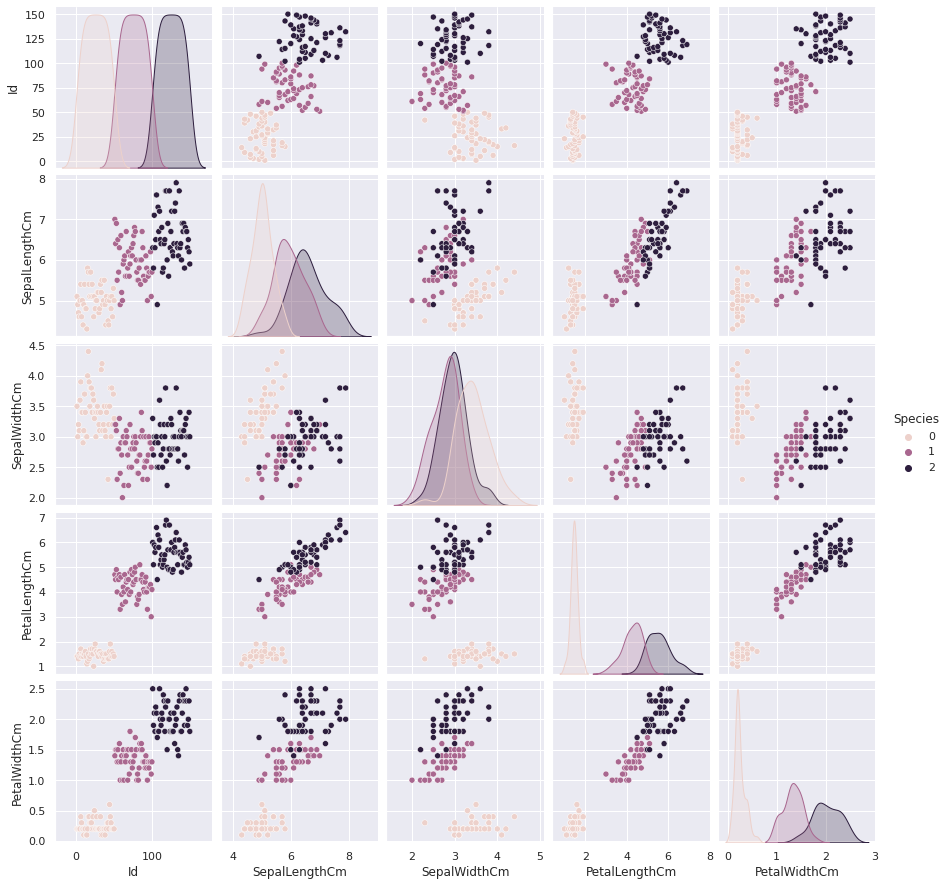

In [15]:
#Pairplot
sns.pairplot(data=df,hue='Species')

#### Comparing Dimension with respect to species

In [16]:
#Scatterplot
colors=['blue','orange','red']
species=[0,1,2]
species_name=['Iris-setosa','Iris-versicolor','Iris-virginica']

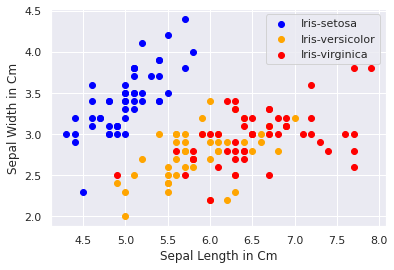

In [17]:
sns.set_style('darkgrid')
for i in range(len(species)):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species_name[i])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.legend()

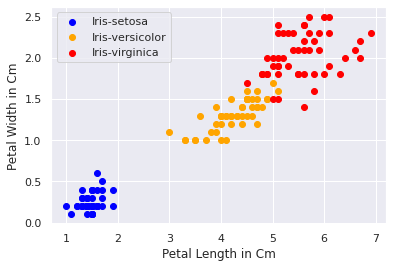

In [18]:
sns.set_style('darkgrid')
for i in range(len(species)):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species_name[i])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()

### Correlation Matrix


In [19]:
#Correlation matrix showing correlation between various attributes in dataset.
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


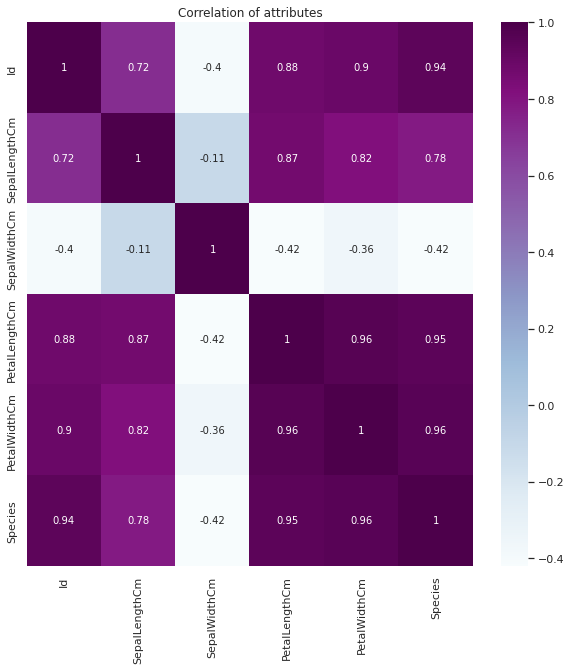

In [20]:
#Correlation matrix showing correlation between various attributes in dataset in a heatmap.
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot=True,cmap="BuPu").set_title("Correlation of attributes")
plt.show()

### Splitting dataset into train and test splits

In [21]:
X = df.drop(['Species'], axis=1)
Y = df['Species']

In [22]:
X_train, X_test, y_train, y_test =  train_test_split(X,Y,test_size= 0.3)

### Classification Analysis

#### Gaussian Naive Bayes Classifier

In [23]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
ac_nb = gnb.score(X_test,y_test)
print("Accuracy of Gaussian Naive Bayes Classifier: ", ac_nb)

Accuracy of Gaussian Naive Bayes Classifier:  0.9555555555555556


In [24]:
print("The Classification report of Gaussian Naive Bayes Classifier:\n",classification_report(y_test,y_pred_gnb))

The Classification report of Gaussian Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [25]:
#Confusion matrix for Gaussian Naive Bayes Classifier
cm = confusion_matrix(y_pred=y_pred_gnb, y_true=y_test)
print("The confusion matrix for Gaussian Naive Bayes Classifier is:\n",cm)

The confusion matrix for Gaussian Naive Bayes Classifier is:
 [[19  0  0]
 [ 0 12  0]
 [ 0  2 12]]


The confusion matrix for Gaussian Naive Bayes Classifier is(in heatmap):



Text(80.90000000000006, 0.5, 'True label')

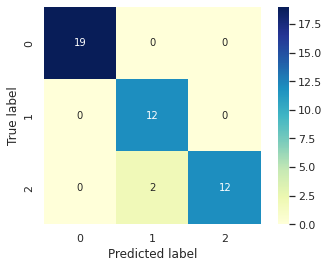

In [26]:
#Confusion matrix for Gaussian Naive Bayes Classifier in a heatmap.
print("The confusion matrix for Gaussian Naive Bayes Classifier is(in heatmap):\n")
sns.heatmap(cm, square=True, annot=True,cmap="YlGnBu")
plt.xlabel('Predicted label')
plt.ylabel('True label')

#### Decision Tree ID3 Classifier

In [27]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=4,
    max_features=5,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=None,
    splitter="best")
dt=dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
ac_dt= dt.score(X_test,y_test)
print("Accuracy of Decision Tree Classifier: ",ac_dt)

Accuracy of Decision Tree Classifier:  1.0


In [28]:
print("The Classification report of Decision Tree Classifier:\n",classification_report(y_test,y_pred_tree))

The Classification report of Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
#Confusion matrix for Decision Tree Classifier
mat_tree = confusion_matrix(y_pred=y_pred_tree, y_true=y_test)
print("The confusion matrix for Decision Tree Classifier is:\n",mat_tree)

The confusion matrix for Decision Tree Classifier is:
 [[19  0  0]
 [ 0 12  0]
 [ 0  0 14]]


The confusion matrix for Decision Tree Classifier is(in heatmap):



Text(80.90000000000006, 0.5, 'True label')

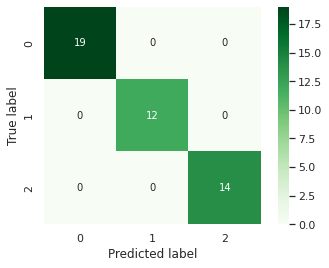

In [30]:
#Confusion matrix for Decision Tree Classifier in a heatmap
print("The confusion matrix for Decision Tree Classifier is(in heatmap):\n")
sns.heatmap(mat_tree, square=True, annot=True,cmap="Greens")
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Comparing accuracies of both classifiers

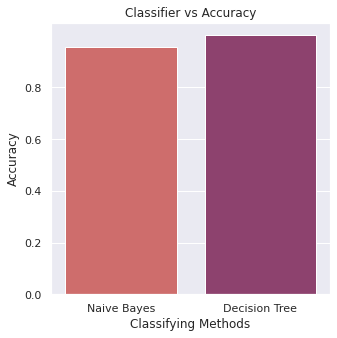

In [31]:
methods=['Naive Bayes', 'Decision Tree']
accuracy=[ac_nb,ac_dt]
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
plt.yticks(np.arange(0,1,0.2))
plt.title("Classifier vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Classifying Methods")
sns.barplot(x=methods,y=accuracy, palette='flare')
plt.show()